In [127]:
import numpy as np 
from matplotlib import colors
import matplotlib
import pylab as pl
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
path='/Users/vjsamuel/pywork/german/german.data'
data = pd.read_csv(path, sep=' ', encoding='Latin1')
work_data = data.dropna()
work_data[:1]

,checking,accage,credit,type,amount,savings,empage,installmentpercent,statussex,guarantors,...,property,age,other,housing,creditcount,job,dependents,telephone,foreign,result
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1


In [130]:
path2 = '/Users/vjsamuel/pywork/german/german.data-numeric'
#numeric = pd.read_csv(path2, sep='\t', encoding='Latin1')
numeric = pd.read_table(path2,delim_whitespace=True)
numeric[:1]

,checking,accage,credit,amount,savings,empage,statussex,resage,property,age,...,carnew,carused,nodebt,coapplicant,renthouse,ownhouse,unempres,unskilledres,skilledemp,result
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1


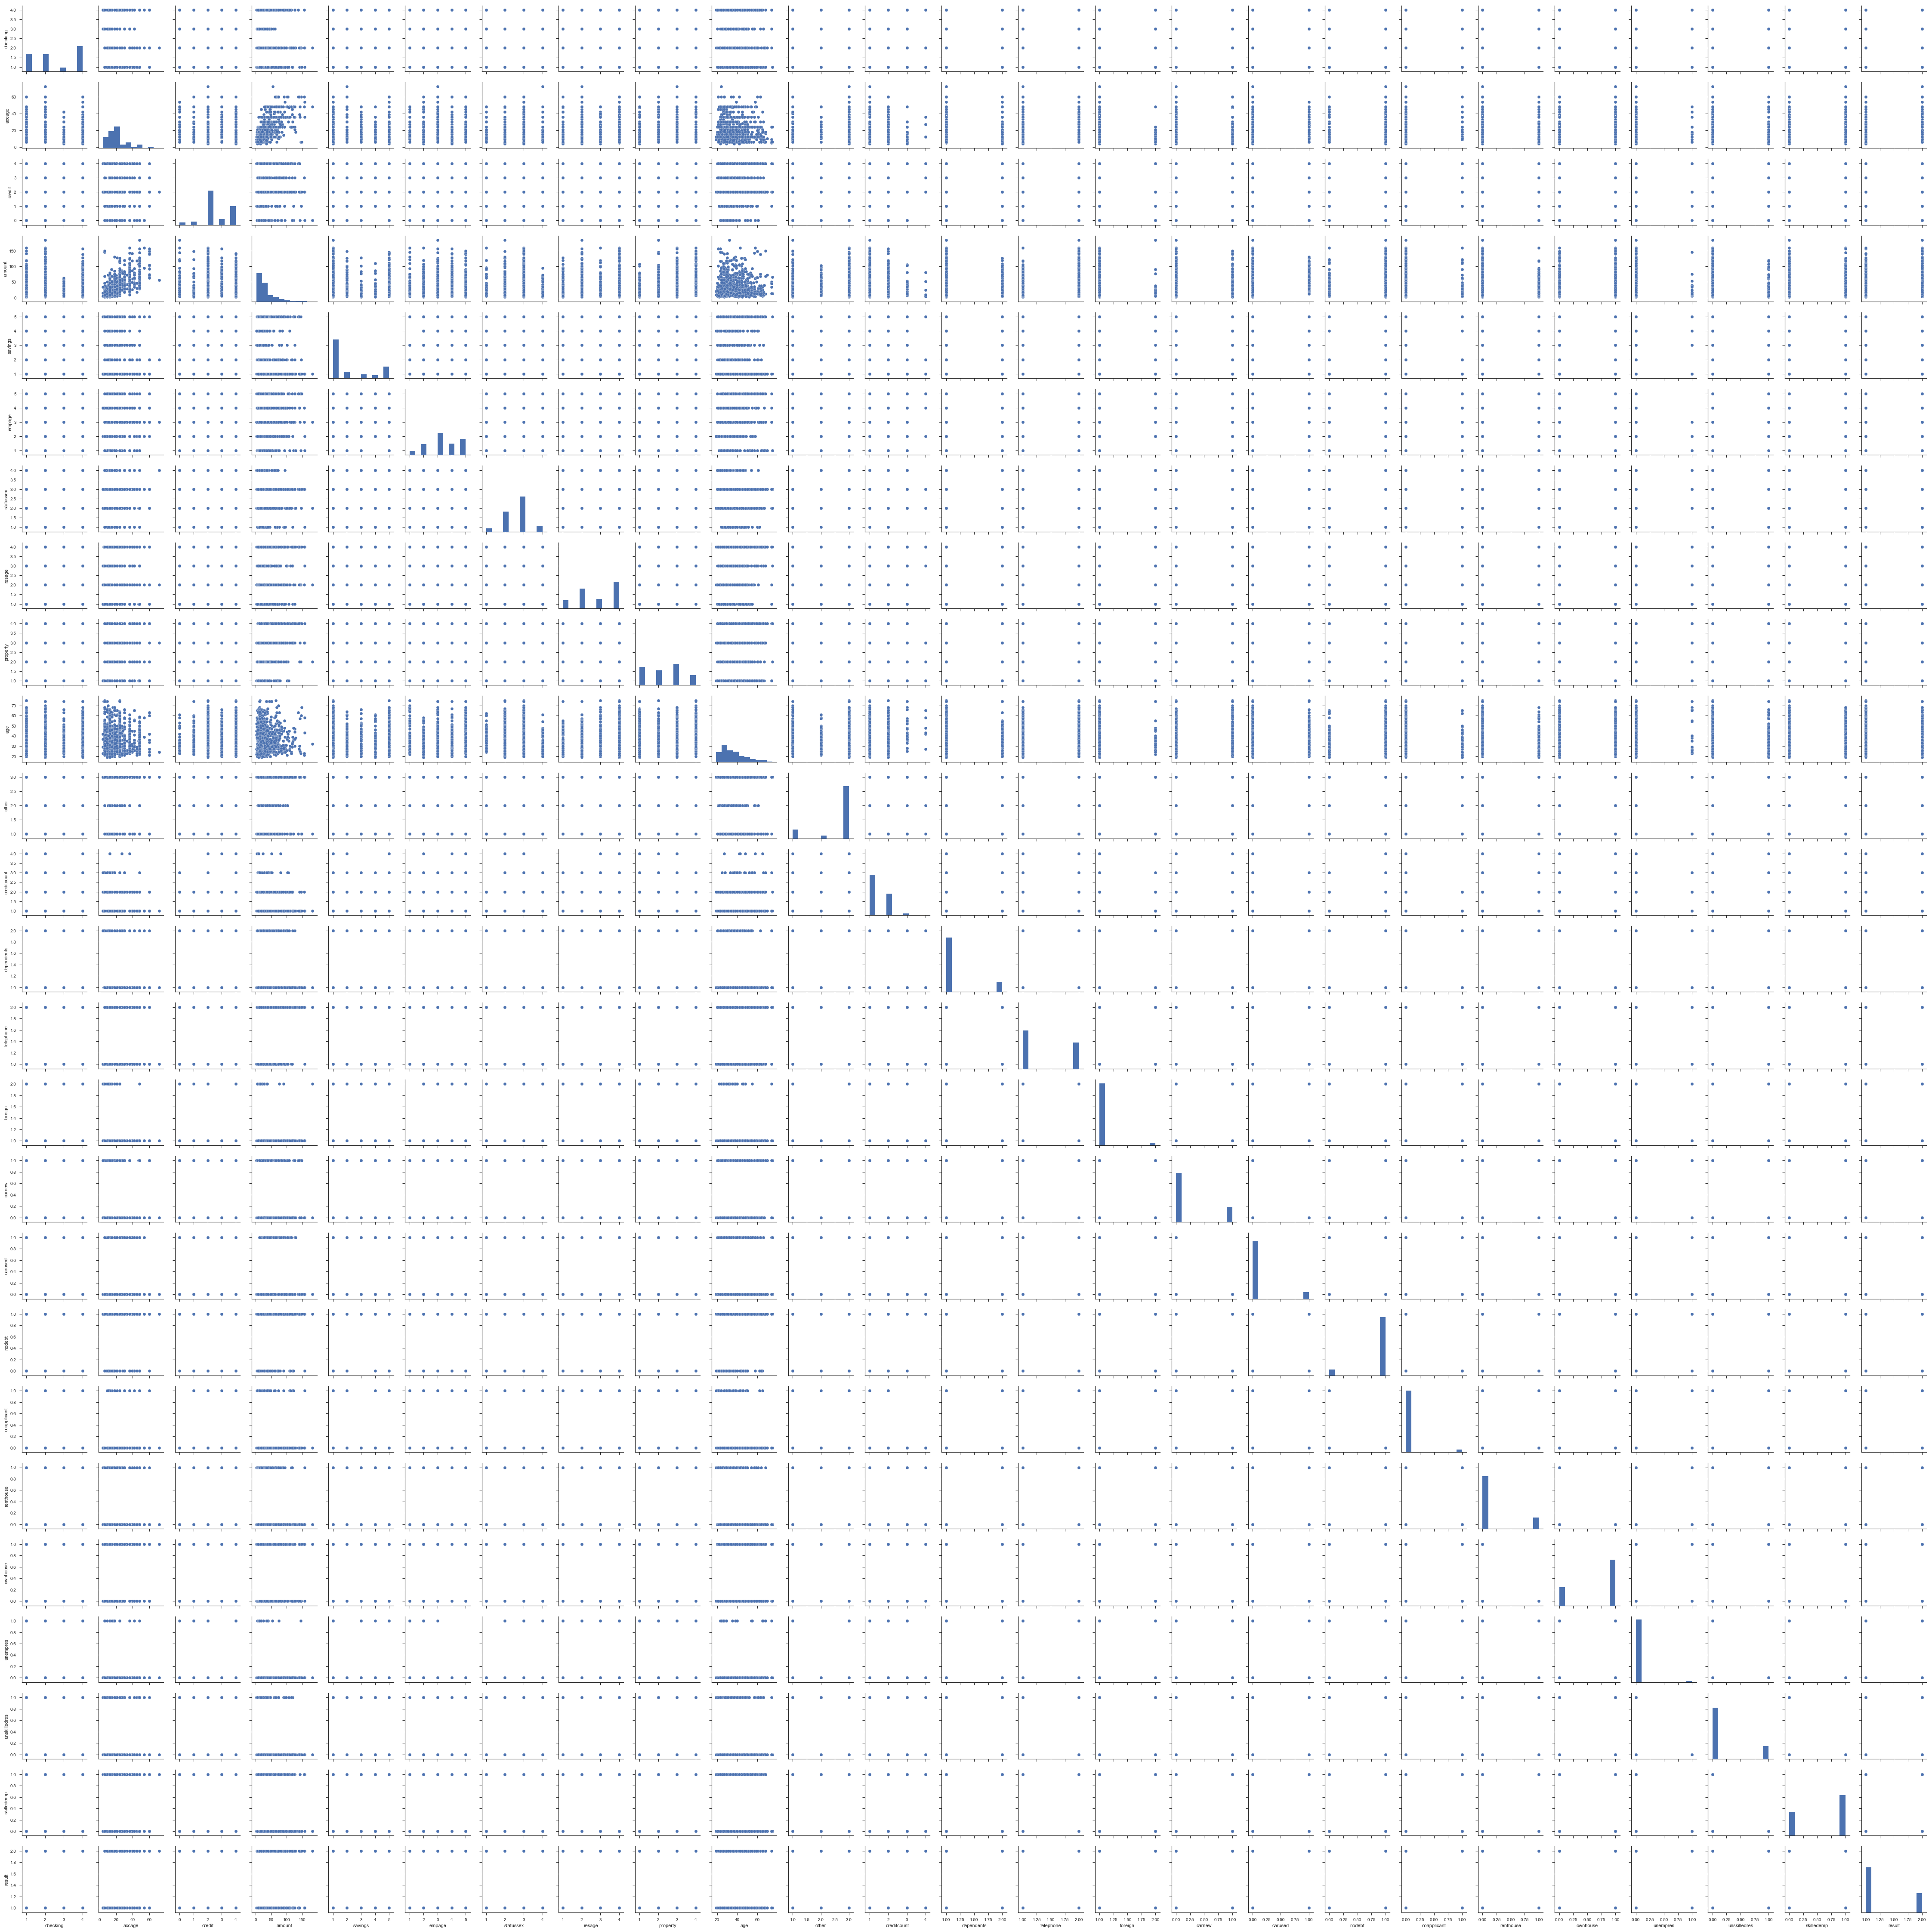

In [131]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(numeric)
### Seen that accage, amount and age have corelation 

In [106]:
work_data.credit = pd.Categorical(work_data.credit)
work_data['credit_coded'] = work_data.credit.cat.codes

work_data.checking = pd.Categorical(work_data.checking)
work_data['checking_coded'] = work_data.checking.cat.codes

work_data.savings = pd.Categorical(work_data.savings)
work_data['savings_coded'] = work_data.savings.cat.codes

work_data.statussex = pd.Categorical(work_data.statussex)
work_data['statussex_coded'] = work_data.statussex.cat.codes

work_data[:5]

,checking,accage,credit,type,amount,savings,empage,installmentpercent,statussex,guarantors,...,creditcount,job,dependents,telephone,foreign,result,credit_coded,checking_coded,savings_coded,statussex_coded
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,2,A173,1,A192,A201,1,4,0,4,2
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,1,A173,1,A191,A201,2,2,1,0,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,1,A172,2,A191,A201,1,4,3,0,2
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,1,A173,2,A191,A201,1,2,0,0,2
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,2,A173,2,A191,A201,2,3,0,0,2


In [107]:
columns = ['credit_coded', 'checking_coded', 'savings_coded']

(array([ 40.,   0.,  49.,   0.,   0., 530.,   0.,  88.,   0., 293.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

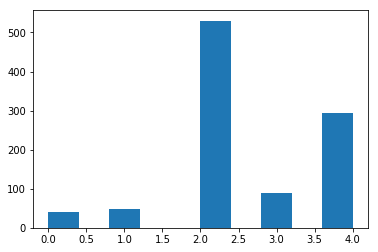

In [108]:
credit = columns[0]
matplotlib.pyplot.hist(work_data[credit])

(array([274.,   0.,   0., 269.,   0.,   0.,  63.,   0.,   0., 394.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

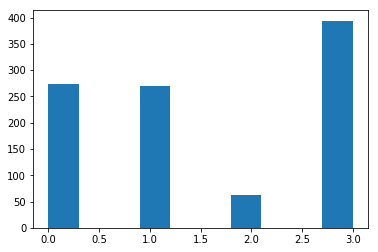

In [109]:
checkings = columns[1]
matplotlib.pyplot.hist(work_data[checkings])

(array([603.,   0., 103.,   0.,   0.,  63.,   0.,  48.,   0., 183.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

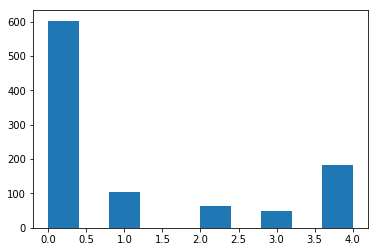

In [110]:
savings = columns[2]
matplotlib.pyplot.hist(work_data[savings])

In [151]:
c1 = ["age", "accage", "amount"]
features = numeric[c1]
def do_kmeans(X, num_cluster):
    model = KMeans(n_clusters=num_cluster)
    model.fit(X)
    return model
kmeans_model = do_kmeans(features, 6)

0
1
2
3
4
5
6
7
8


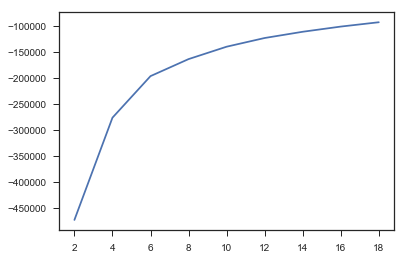

In [152]:
def optimal_clusters(df):
    Nc = range(2, 20, 2)
    data_km = df.values
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = []
    for i in range(len(kmeans)):
        print(i)
        score.append(kmeans[i].fit(data_km).score(data_km))
    return Nc, score
#Nc, score = optimal_clusters(df_kmeans)
Nc, score = optimal_clusters(features)
pl.plot(Nc,score)

In [153]:
data_labels = kmeans_model.predict(features)
collections.Counter(data_labels)

Counter({3: 171, 2: 83, 4: 83, 5: 392, 0: 236, 1: 35})

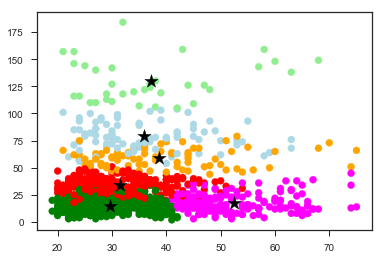

In [154]:
color_map=['red', 'lightgreen', 'lightblue', 'magenta', 'orange', 'green']
plt.scatter(features.iloc[:, 0], features.iloc[:,2], c=data_labels, cmap=colors.ListedColormap(color_map))
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', marker='*', s=200);
plt.show()

In [185]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    #ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

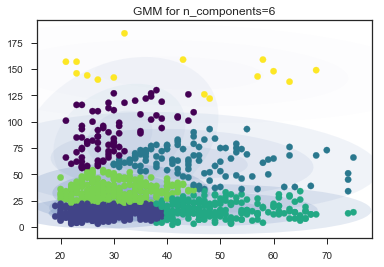

In [187]:
number_of_components=6
from sklearn.mixture import GaussianMixture
c2 = ["age", "amount"]
f2 = numeric[c2]
gmm = GaussianMixture(n_components=number_of_components,covariance_type='full',verbose=0,verbose_interval=10,max_iter=5000).fit(f2.values)
labels = gmm.predict(f2.values)
X = f2.values
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis');
plt.title("GMM for n_components=6")
plot_gmm(gmm,X)

In [235]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
c3 = ["credit", "amount", "acca"]
f3 = numeric[c3]
result = numeric["result"]
gnb.fit(f3, result)
gnb.score(f3, result)

0.736

In [236]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(f3, result)
predict = lr.predict(f3)
lr.score(f3, result)

0.757

In [237]:
from sklearn import metrics
cm = metrics.confusion_matrix(result, predict)

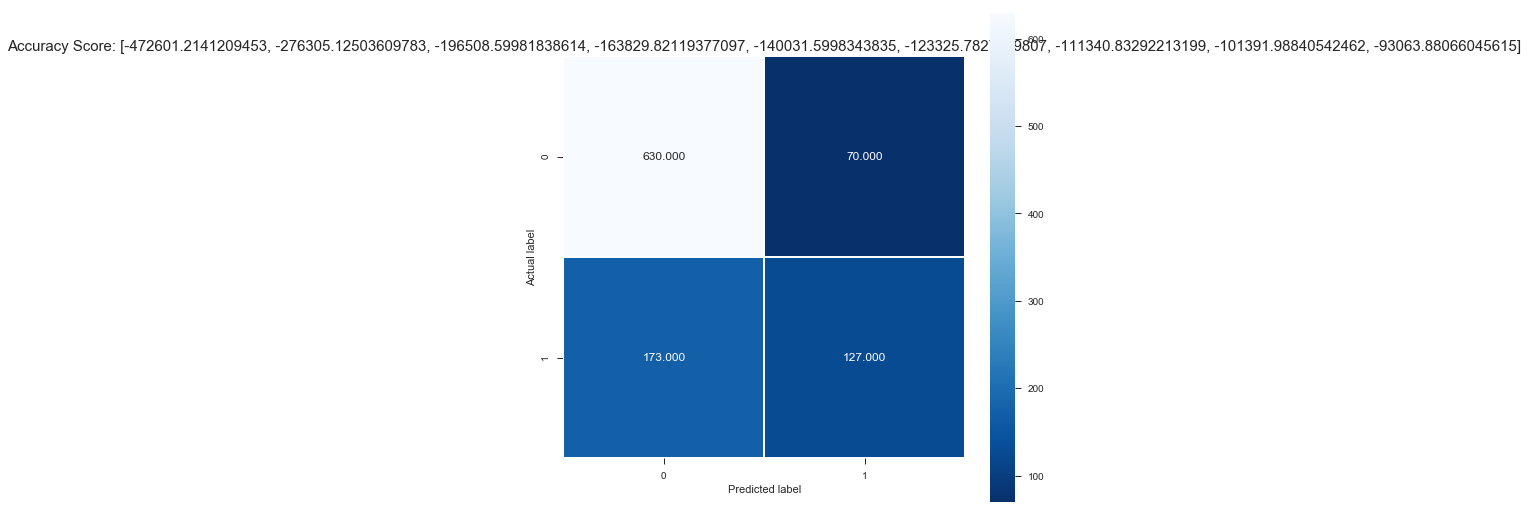

In [238]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);